## What % of service requests are closed (CLOSED_DT or CASE_STATUS) vs. no data (CASE_STATUS = null) vs. unresolved (CASE_STATUS = open)?



#### First we need to import the data and clean it up a bit. We will be using the data for total years from 2011-2023.

In [1]:
# Import libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Some global variables
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019','2020','2021','2022','2023']
int_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019,2020,2021,2022,2023]

In [2]:
# Cleaning the data a bit:

# Read in the data
df = pd.read_csv('../../data/data_total2.csv', low_memory=False)

# Add the columns we only need to a new variable, only get the column we need which is CASE_STATUS and CLOSED_DT

new_df = df[['case_status', 'closed_dt', 'open_dt']]

# Show the head of the new_df
new_df.head()

,case_status,closed_dt,open_dt
0,Closed,2011-07-01 01:06:58,2011-06-30 21:32:33
1,Closed,2011-07-01 02:12:43,2011-06-30 22:18:31
2,Closed,2011-08-01 11:21:46,2011-06-30 22:28:04
3,Closed,2011-07-22 12:13:45,2011-06-30 23:03:48
4,Closed,2011-07-01 02:12:38,2011-06-30 23:12:31




#### Creating a dataframe with the breakdown of the date and the case status. We will be using the CASE_STATUS column to determine if the case is open or closed.

In [46]:
# Suppress the error messages for now
pd.options.mode.chained_assignment = None  # default='warn'

# Convert the closed_dt column to a datetime object
new_df['closed_dt'] = pd.to_datetime(new_df['closed_dt'])

# Convert the open_dt column to a datetime object
new_df['open_dt'] = pd.to_datetime(new_df['open_dt'])

# Break them down into their respective parts of open years
new_df['year'] = new_df['open_dt'].dt.year

new_df.head()

,case_status,closed_dt,open_dt,year
0,Closed,2011-07-01 01:06:58,2011-06-30 21:32:33,2011
1,Closed,2011-07-01 02:12:43,2011-06-30 22:18:31,2011
2,Closed,2011-08-01 11:21:46,2011-06-30 22:28:04,2011
3,Closed,2011-07-22 12:13:45,2011-06-30 23:03:48,2011
4,Closed,2011-07-01 02:12:38,2011-06-30 23:12:31,2011



### Checking the percent of open cases vs closed cases and null cases for their case status.


#### First find open cases status data and then find the percent of open cases.

Percent of open cases: 7.256478277232631% on average from 2011-2023



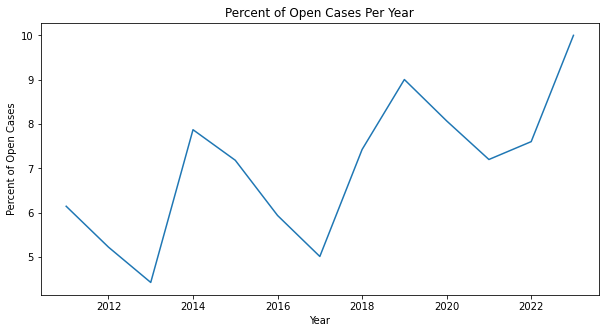

In [47]:
# First calculate the percent of open cases in general out of all the years
# Get the total number of cases
total_cases = new_df.shape[0]

# Get the number of open cases
open_cases = new_df[new_df['case_status'] == 'Open'].shape[0]

# Calculate the percent of open cases
percent_open_cases = open_cases / total_cases * 100

print(f'Percent of open cases: {percent_open_cases}% on average from 2011-2023')
print()

# Now calculate the percent of open cases per year
# Get the total number of cases per year
total_cases_per_year = new_df.groupby('year').size()
total_cases_per_year = total_cases_per_year.tolist()

# Get the number of open cases per year
open_cases_per_year = new_df[new_df['case_status'] == 'Open'].groupby('year').size()
open_cases_per_year = open_cases_per_year.tolist()

# Calculate the percent of open cases per year
percent_open_cases_per_year = []
for i in range(len(total_cases_per_year)):
    percent_open_cases_per_year.append(open_cases_per_year[i] / total_cases_per_year[i] * 100)


# Plot the percent of open cases per year
plt.figure(figsize=(10, 5))
plt.plot(int_years, percent_open_cases_per_year)
plt.title('Percent of Open Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Percent of Open Cases')
plt.show()

The percent of open cases increases and decreases throughout the years but at the end has an all time high of open cases for 2023. 2023 is not finished and could be the reasoning for such high open cases. 

#### Next, the examining the closed cases data and then finding the percent of closed cases.

Percent of closed cases: 92.74352172276737% on average from 2011-2023

[54682, 111924, 136298, 136184, 194994, 203679, 238675, 243238, 235700, 230947, 254072, 255570, 229930]
Percent of closed cases in 2011: 93.85534310528303%
Percent of closed cases in 2012: 94.77695356162992%
Percent of closed cases in 2013: 95.57394292125377%
Percent of closed cases in 2014: 92.12826410499257%
Percent of closed cases in 2015: 92.81760066259525%
Percent of closed cases in 2016: 94.06285358025261%
Percent of closed cases in 2017: 94.98784171545236%
Percent of closed cases in 2018: 92.57463425030828%
Percent of closed cases in 2019: 90.99613160272101%
Percent of closed cases in 2020: 91.92944885400163%
Percent of closed cases in 2021: 92.80016363264471%
Percent of closed cases in 2022: 92.39729717027177%
Percent of closed cases in 2023: 89.99956943623546%


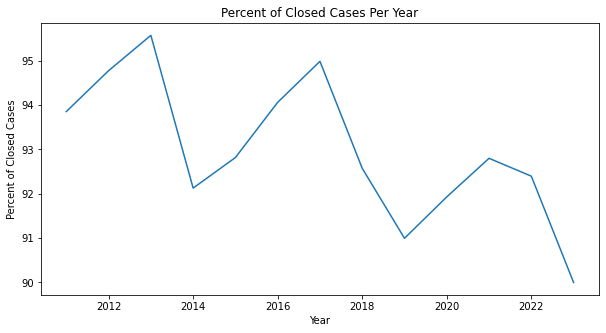

In [48]:
# Closed Cases amount:
closed_cases = new_df[new_df['case_status'] == 'Closed'].shape[0]

# Calculate the percent of closed cases
percent_closed_cases = closed_cases / total_cases * 100

print(f'Percent of closed cases: {percent_closed_cases}% on average from 2011-2023')
print()

# Now calculate the percent of closed cases per year
# Get the number of closed cases per year
closed_cases_per_year = new_df[new_df['case_status'] == 'Closed'].groupby('year').size()
closed_cases_per_year = closed_cases_per_year.tolist()

# Calculate the percent of closed cases per year
print(closed_cases_per_year)
percent_closed_cases_per_year = (np.array(closed_cases_per_year) / total_cases_per_year) * 100

for i in range(len(total_cases_per_year)):
    print(f'Percent of closed cases in {years[i]}: {percent_closed_cases_per_year[i]}%')

# Plot the percent of closed cases per year
plt.figure(figsize=(10, 5))
plt.plot(int_years, percent_closed_cases_per_year)
plt.title('Percent of Closed Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Percent of Closed Cases')
plt.show()

Based on this plot, we can say that the percent of closed cases increased throughout the years but also declined depending on the year. This could be due to the various types of cases per year that may have not been closed due to it being harder to close than others.

#### Finally, examining the null cases data and then finding the percent of null cases.

In [49]:
#Finding the number of NA values in the case_status column

# Get the number of NA values in the case_status column
na_values = new_df[new_df['case_status'].isna()].shape[0]
print(f'Number of NA values in the case_status column: {na_values} on average from 2011-2023')

# Calculate the percent of NA values in the case_status column
percent_na_values = na_values / total_cases * 100

print(f'Percent of NA values in the case_status column: {percent_na_values}% on average from 2011-2023')

Number of NA values in the case_status column: 0 on average from 2011-2023
Percent of NA values in the case_status column: 0.0% on average from 2011-2023


The percent of Na values is at a constant 0 throughout all the years. This makes sense because a case can be either open or closed and therefore there is no other option for the case status. If Na value were to exist, it would be due to error in the data.

### Understanding Volume of Cases

#### Now we will be looking at the volume of cases closed vs open vs null.

The total number of cases is: 2723525 cases
The total number of open cases is: 197632 cases
The total number of closed cases is: 2525893 cases
The total number of NA values in the case_status column is: 0 cases


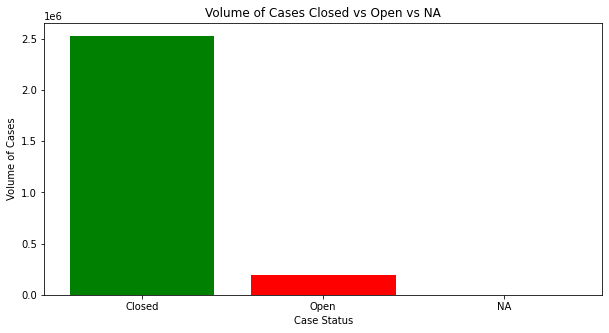

In [50]:
# Plot the graph of volume of cases closed vs open vs NA

total_cases = new_df.shape[0]

print(f"The total number of cases is: {total_cases} cases")
print(f"The total number of open cases is: {open_cases} cases")
print(f"The total number of closed cases is: {closed_cases} cases")
print(f"The total number of NA values in the case_status column is: {na_values} cases")

plt.figure(figsize=(10, 5))
plt.bar(['Closed', 'Open', 'NA'], [closed_cases, open_cases, na_values], color=['green', 'red', 'blue'])
plt.title('Volume of Cases Closed vs Open vs NA')
plt.xlabel('Case Status')
plt.ylabel('Volume of Cases')
plt.show()

#### Looking at the volume of open vs closed cases throughout the years.

Number of open cases in 2011: 3580 cases
Number of closed cases in 2011: 54682 cases
Number of NA values in 2011: 0 cases

Number of open cases in 2012: 6168 cases
Number of closed cases in 2012: 111924 cases
Number of NA values in 2012: 0 cases

Number of open cases in 2013: 6312 cases
Number of closed cases in 2013: 136298 cases
Number of NA values in 2013: 0 cases

Number of open cases in 2014: 11636 cases
Number of closed cases in 2014: 136184 cases
Number of NA values in 2014: 0 cases

Number of open cases in 2015: 15089 cases
Number of closed cases in 2015: 194994 cases
Number of NA values in 2015: 0 cases

Number of open cases in 2016: 12856 cases
Number of closed cases in 2016: 203679 cases
Number of NA values in 2016: 0 cases

Number of open cases in 2017: 12594 cases
Number of closed cases in 2017: 238675 cases
Number of NA values in 2017: 0 cases

Number of open cases in 2018: 19510 cases
Number of closed cases in 2018: 243238 cases
Number of NA values in 2018: 0 cases

Numb

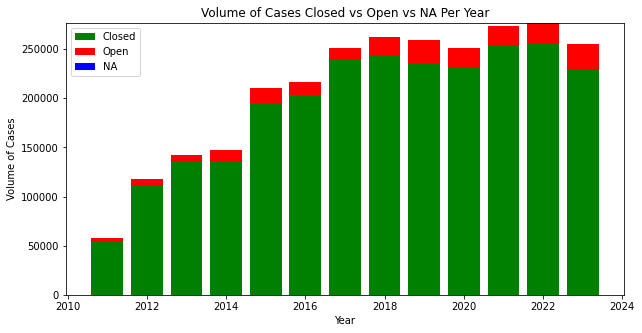

In [51]:
# Looking at the volume of open vs closed cases throughout the years.

# Number of open, closed, and NA cases per year
for i in range(len(total_cases_per_year)):
    print(f'Number of open cases in {years[i]}: {open_cases_per_year[i]} cases')
    print(f'Number of closed cases in {years[i]}: {closed_cases_per_year[i]} cases')
    print(f'Number of NA values in {years[i]}: {na_values} cases')
    print()

# Plot the graph of volume of cases closed vs open vs NA per year
plt.figure(figsize=(10, 5))
plt.bar(int_years, closed_cases_per_year, color='green')
plt.bar(int_years, open_cases_per_year, bottom=closed_cases_per_year, color='red')
plt.bar(int_years, na_values, bottom=np.array(closed_cases_per_year) + np.array(open_cases_per_year), color='blue')
plt.title('Volume of Cases Closed vs Open vs NA Per Year')
plt.xlabel('Year')
plt.ylabel('Volume of Cases')
plt.legend(['Closed', 'Open', 'NA'])
plt.show()

Based on this per year plot, it is shown that the proportion of open cases increases compared to its relative closed cases.

#### A normalized look into this data

[ 58262 118092 142610 147820 210083 216535 251269 262748 259022 251222
 273784 276599 255479]
Proportion of closed cases in 2011: 0.9385534310528303
Proportion of open cases in 2011: 0.06144656894716968
Proportion of NA values in 2011: 0.0

Proportion of closed cases in 2012: 0.9477695356162992
Proportion of open cases in 2012: 0.052230464383700846
Proportion of NA values in 2012: 0.0

Proportion of closed cases in 2013: 0.9557394292125377
Proportion of open cases in 2013: 0.04426057078746231
Proportion of NA values in 2013: 0.0

Proportion of closed cases in 2014: 0.9212826410499256
Proportion of open cases in 2014: 0.07871735895007441
Proportion of NA values in 2014: 0.0

Proportion of closed cases in 2015: 0.9281760066259526
Proportion of open cases in 2015: 0.0718239933740474
Proportion of NA values in 2015: 0.0

Proportion of closed cases in 2016: 0.9406285358025261
Proportion of open cases in 2016: 0.05937146419747385
Proportion of NA values in 2016: 0.0

Proportion of closed cas

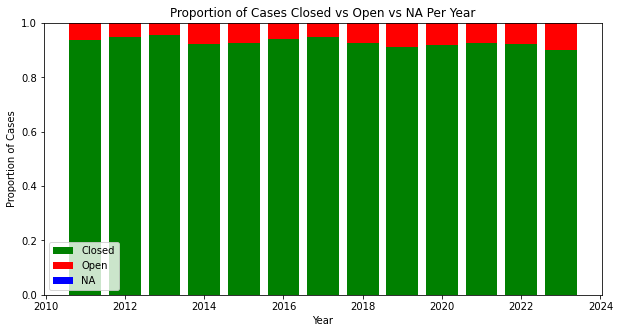

Percent of closed cases in 2011: 93.85534310528303%
Percent of open cases in 2011: 6.144656894716968%
Percent of NA values in 2011: 0.0%

Percent of closed cases in 2012: 94.77695356162992%
Percent of open cases in 2012: 5.223046438370084%
Percent of NA values in 2012: 0.0%

Percent of closed cases in 2013: 95.57394292125377%
Percent of open cases in 2013: 4.426057078746231%
Percent of NA values in 2013: 0.0%

Percent of closed cases in 2014: 92.12826410499257%
Percent of open cases in 2014: 7.871735895007441%
Percent of NA values in 2014: 0.0%

Percent of closed cases in 2015: 92.81760066259525%
Percent of open cases in 2015: 7.182399337404741%
Percent of NA values in 2015: 0.0%

Percent of closed cases in 2016: 94.06285358025261%
Percent of open cases in 2016: 5.937146419747385%
Percent of NA values in 2016: 0.0%

Percent of closed cases in 2017: 94.98784171545236%
Percent of open cases in 2017: 5.0121582845476365%
Percent of NA values in 2017: 0.0%

Percent of closed cases in 2018: 

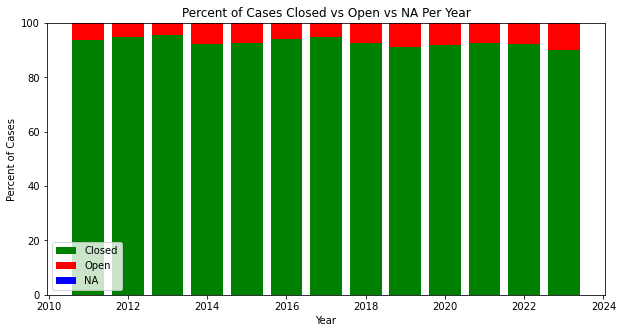

In [52]:
# Calculate the total cases for each year
total_cases_per_year = np.array(closed_cases_per_year) + np.array(open_cases_per_year) + np.array(na_values)

# Calculate proportions
proportion_closed = np.array(closed_cases_per_year) / total_cases_per_year
proportion_open = np.array(open_cases_per_year) / total_cases_per_year
proportion_na = np.array(na_values) / total_cases_per_year

print(total_cases_per_year)

# Print the proportions for each year
for i in range(len(total_cases_per_year)):
    print(f'Proportion of closed cases in {years[i]}: {proportion_closed[i]}')
    print(f'Proportion of open cases in {years[i]}: {proportion_open[i]}')
    print(f'Proportion of NA values in {years[i]}: {proportion_na[i]}')
    print()

plt.figure(figsize=(10, 5))
plt.bar(int_years, proportion_closed, color='green')
plt.bar(int_years, proportion_open, bottom=proportion_closed, color='red')
plt.bar(int_years, proportion_na, bottom=proportion_closed + proportion_open, color='blue')

plt.title('Proportion of Cases Closed vs Open vs NA Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Cases')
plt.legend(['Closed', 'Open', 'NA'])
plt.ylim(0, 1)  
plt.show()

# Print the percents for each year
for i in range(len(total_cases_per_year)):
    print(f'Percent of closed cases in {years[i]}: {proportion_closed[i] * 100}%')
    print(f'Percent of open cases in {years[i]}: {proportion_open[i] * 100}%')
    print(f'Percent of NA values in {years[i]}: {proportion_na[i] * 100}%')
    print()

plt.figure(figsize=(10, 5))
plt.bar(int_years, percent_closed_cases_per_year, color='green')
plt.bar(int_years, percent_open_cases_per_year, bottom=percent_closed_cases_per_year, color='red')
plt.bar(int_years, percent_na_values, bottom=np.array(percent_closed_cases_per_year) + np.array(percent_open_cases_per_year), color='blue')
plt.title('Percent of Cases Closed vs Open vs NA Per Year')
plt.xlabel('Year')
plt.ylabel('Percent of Cases')
plt.legend(['Closed', 'Open', 'NA'])
plt.ylim(0, 100)
plt.show()

All these plots show that the volume of open cases is increasing throughout the years even though there are ups and downs, by the end of the last data point of 2023, the amount of open cases per year is at an all time high. This is also true for closed cases as well. This can be because of the sheer volume increase in total cases reported per year. 

### The percent of cases that are closed is 92.74352172276737% and the percent of cases that are open is 7.256478277232631% and the percent of cases that are NA values are 0.0%